In [1]:
import pandas as pd
from besos import eppy_funcs as ef
from besos.evaluator import EvaluatorEP
from besos.parameters import RangeParameter, FieldSelector, FilterSelector, Parameter, expand_plist, wwr, CategoryParameter, GenericSelector
from besos.problem import EPProblem
import numpy as np
import copy
from seaborn import pairplot
import matplotlib.pyplot as plt

In [3]:
#here we're building the range within the optimization will happen

building_params= []
orientations = [180,270] #,270
WWRs = [.05, .15, .50] #
thickness = np.linspace(0.0001,0.35,10)
for orientation in orientations:
    for w in WWRs:
        for th in thickness:
            building_params.append({'Orientation': orientation,
                                             'WWR': w,
                                             'Insulation': th,
                                      
                                       })
samples = pd.DataFrame.from_dict(building_params)
samples

,Orientation,WWR,Insulation
0,180,0.05,0.000100
1,180,0.05,0.038978
2,180,0.05,0.077856
3,180,0.05,0.116733
4,180,0.05,0.155611
5,180,0.05,0.194489
6,180,0.05,0.233367
7,180,0.05,0.272244
8,180,0.05,0.311122
9,180,0.05,0.350000


In [11]:
#here we build the dataframe where we save the results

results = pd.core.frame.DataFrame()

#extract the building object from the idf file
building = ef.get_building('/home/ict4bd/triple_off_.idf')
    #print(building)
#wwr_all(building,0.0001)
# fieldselector()=A selector that modifies one or more fields
#in an EnergyPlus building, based on the class, object and field names   

# Here we change the insulation and orientation of the building
insulation = FieldSelector(class_name='Material', object_name='XPS Extruded Polystyrene  - CO2 Blowing_.O795', field_name='Thickness')
    
orientation = FieldSelector(class_name='Building', field_name='North Axis')

# Setup the parameters
insulationPR = Parameter(selector=insulation, value_descriptor=RangeParameter(0.0001, 0.35),
                             name='Insulation')      
window_to_wall = wwr(CategoryParameter(options=[.05,.15,.5]))

orientationPR = Parameter(selector=orientation, value_descriptor=CategoryParameter(options=[180, 270]),
                          name='Orientation')

parameters = [orientationPR, window_to_wall, insulationPR]

#print(parameters)

objectives = ['Electricity:Facility', 'DistrictHeating:Facility', 'DistrictCooling:Facility']

problem = EPProblem(parameters, objectives)

#print(problem)

In [12]:
#This evaluator uses a Problem to modify a building, and then simulate it.
#    It keeps track of the building and the weather file.
evaluator = EvaluatorEP(problem, building, out_dir='outputdir', 
                        #error_mode='Silent', 
                        err_dir='outputdir',
                        epw='/home/ict4bd/GRC_Athens.167160_IWEC.epw')



In [13]:

outputs = evaluator.df_apply(samples, keep_input=True)
#Applies this evaluator to an entire dataFrame, row by row.

 #       :param df: a DataFrame where each row represents valid input values for this Evaluator. 
    #    in this case the inputs are all the possible values of the params to be optimized
       #  :param keep_input: whether to include the input data in the returned DataFrame
      #  :param processes: amount of cores to use (only relevant when using multiprocessing)
       # :param keep_dirs: whether or not keep output directory
        #:return: Returns a DataFrame with one column containing the results for each objective.
        

results = results.append(outputs)
print(results)

KeyboardInterrupt: 

In [ ]:
total_area= 0
for Zones in building.idfobjects["Zone"]:
    total_area += float(Zones.checkrange("Floor_Area")) 
total_area

In [9]:
#consumption by hour

results['Electricity:Facility'] /= 3.6e6
results['DistrictHeating:Facility'] /= 3.6e6
results['DistrictCooling:Facility'] /= 3.6e6
results['TotalConsumption'] = results['DistrictHeating:Facility'] + results['DistrictCooling:Facility']
results

KeyError: 'Electricity:Facility'

In [11]:
results = results.reset_index()
results


,index,Orientation,WWR,Insulation,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility,TotalConsumption
0,0,180,0.05,0.000100,2521.219455,4835.496272,2924.270608,7759.766880
1,1,180,0.05,0.038978,2521.219455,4085.285060,2124.549539,6209.834599
2,2,180,0.05,0.077856,2521.219455,3916.272206,1962.256658,5878.528865
3,3,180,0.05,0.116733,2521.219455,3842.436990,1890.439716,5732.876706
4,4,180,0.05,0.155611,2521.219455,3800.400202,1849.150650,5649.550852
5,5,180,0.05,0.194489,2521.219455,3773.099193,1823.435061,5596.534254
6,6,180,0.05,0.233367,2521.219455,3754.687618,1805.588803,5560.276422
7,7,180,0.05,0.272244,2521.219455,3741.266694,1792.686931,5533.953625
8,8,180,0.05,0.311122,2521.219455,3731.029454,1783.014642,5514.044096
9,9,180,0.05,0.350000,2521.219455,3722.700201,1775.111951,5497.812152


In [12]:
results['Electricity:Facility'] /= total_area
results['DistrictHeating:Facility'] /= total_area
results['DistrictCooling:Facility'] /= total_area
results['TotalConsumption'] /= total_area
results

,index,Orientation,WWR,Insulation,Electricity:Facility,DistrictHeating:Facility,DistrictCooling:Facility,TotalConsumption
0,0,180,0.05,0.000100,53.805758,103.195120,62.407339,165.602458
1,1,180,0.05,0.038978,53.805758,87.184739,45.340360,132.525099
2,2,180,0.05,0.077856,53.805758,83.577808,41.876841,125.454649
3,3,180,0.05,0.116733,53.805758,82.002078,40.344184,122.346263
4,4,180,0.05,0.155611,53.805758,81.104964,39.463027,120.567992
5,5,180,0.05,0.194489,53.805758,80.522329,38.914227,119.436556
6,6,180,0.05,0.233367,53.805758,80.129405,38.533367,118.662772
7,7,180,0.05,0.272244,53.805758,79.842987,38.258026,118.101013
8,8,180,0.05,0.311122,53.805758,79.624512,38.051608,117.676120
9,9,180,0.05,0.350000,53.805758,79.446756,37.882955,117.329711


In [15]:
samples_for_plot = copy.deepcopy(results)
samples_for_plot = samples_for_plot.drop(columns=['DistrictHeating:Facility', 'DistrictCooling:Facility','TotalConsumption','Electricity:Facility','index'])
samples_for_plot

,Orientation,WWR,Insulation
0,180,0.05,0.000100
1,180,0.05,0.038978
2,180,0.05,0.077856
3,180,0.05,0.116733
4,180,0.05,0.155611
5,180,0.05,0.194489
6,180,0.05,0.233367
7,180,0.05,0.272244
8,180,0.05,0.311122
9,180,0.05,0.350000


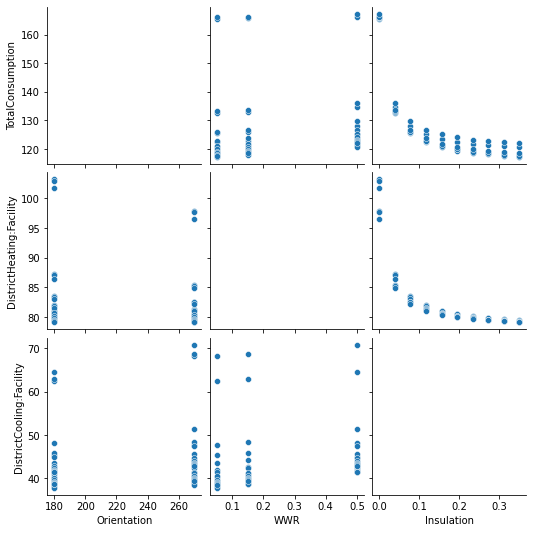

In [18]:
#objectives = ['TotalConsumption', 'DistrictHeating:Facility', 'DistrictCooling:Facility']
#_ = pairplot(results, x_vars=samples_for_plot.columns, y_vars=objectives, kind="scatter")

Text(0, 0.5, 'DistrictCooling:Facility')

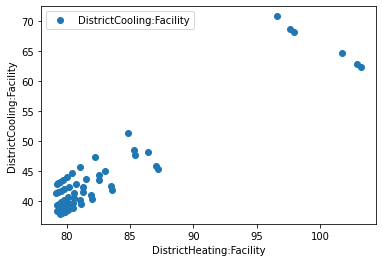

In [21]:
#_ = results.plot(x=objectives[1], y=objectives[2], style='o')
#plt.xlabel(objectives[1])
#plt.ylabel(objectives[2])

In [23]:
min_value_index = results[['TotalConsumption']].idxmin()
print(results.iloc[min_value_index])

   index  Orientation   WWR  Insulation  Electricity:Facility  \
9      9          180  0.05        0.35             53.805758   

   DistrictHeating:Facility  DistrictCooling:Facility  TotalConsumption  
9                 79.446756                 37.882955        117.329711  


In [2]:
'''
         on  off   Orientation   WWR  Insulation  Electricity:Facility  DistrictHeating:Facility  DistrictCooling:Facility  Total consumption
single

double 

triple

'''
#d = {'col1': [1, 2], 'col2': [3, 4]}
#df = pd.DataFrame(data=d)
#results_2 = pd.core.frame.DataFrame()
#results_2.append(results.iloc[min_value_index])


#with open('document.csv','a') as fd:
#    fd.write(results.iloc[min_value_index])

NameError: name 'results' is not defined